<a href="https://colab.research.google.com/github/marybaron/Intro-to-Machine-Learning/blob/main/FacialRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition
import face_recognition
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=46a01be11796d02726775b84a5a9c3afc0664767270b97ae0112f499dd634bf8
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [7]:
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

In [3]:
known_encodings = []
known_names = []
known_dir = 'known'

In [8]:
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

In [9]:
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  print("Processing", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

Processing Aaron_Peirsol_0003.jpg
Processing Ben_Affleck_0007.jpg
Processing Zydrunas_Ilgauskas_0001.jpg
Processing Adam_Scott_0002.jpg
Processing Adam_Sandler_0004.jpg


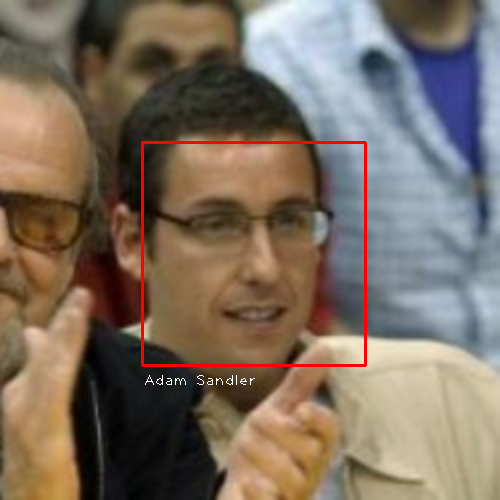

[False, False, True, False, False, False]


In [11]:
results = face_recognition.compare_faces(known_encodings, img_enc)

for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)

print(results)